In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
from sklearn import svm, preprocessing
from matplotlib import style


In [3]:
df=pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [7]:
df


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# EDA

# Number of visitors

array([<AxesSubplot:ylabel='count'>], dtype=object)

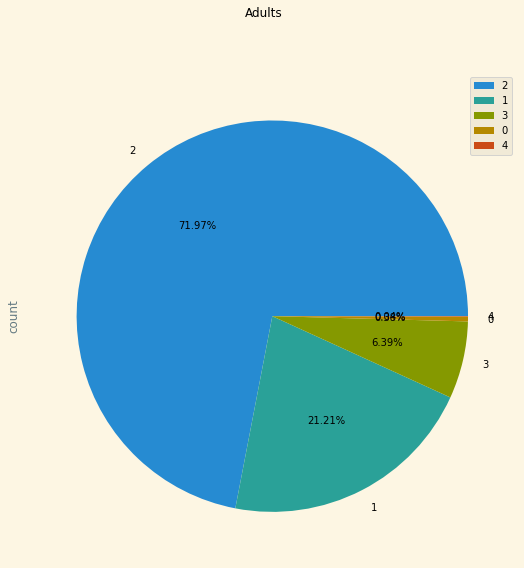

In [8]:
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Adults',figsize=(9,9))


array([<AxesSubplot:ylabel='count'>], dtype=object)

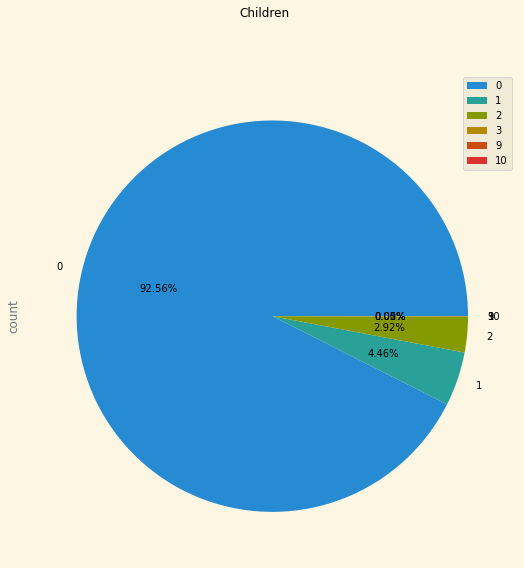

In [9]:
df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Children',figsize=(9,9))


# Nights

<AxesSubplot:xlabel='no_of_weekend_nights'>

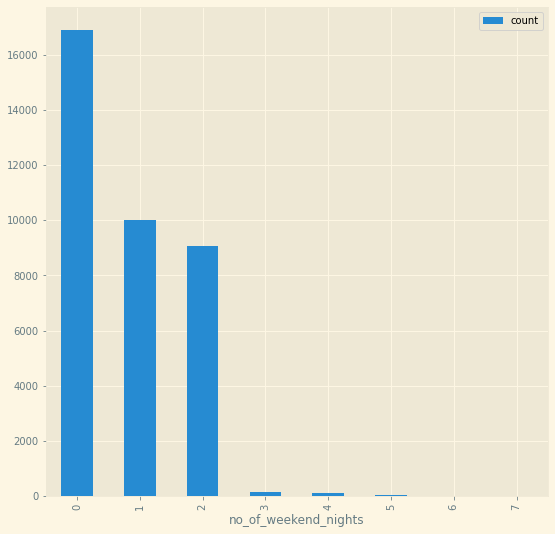

In [10]:
df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',figsize=(9,9))


<AxesSubplot:ylabel='no_of_week_nights'>

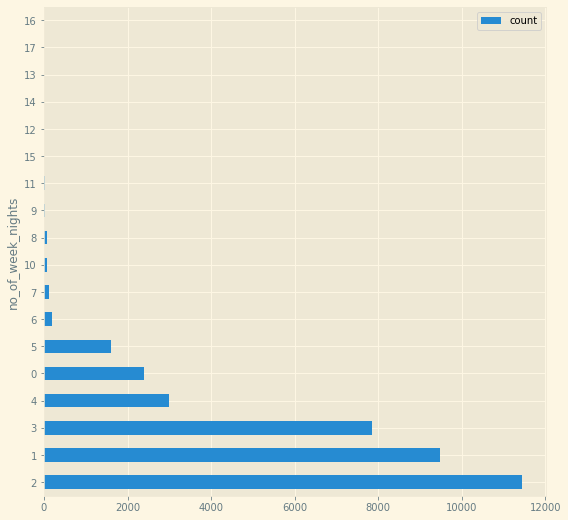

In [11]:
df.groupby('no_of_week_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(9,9))


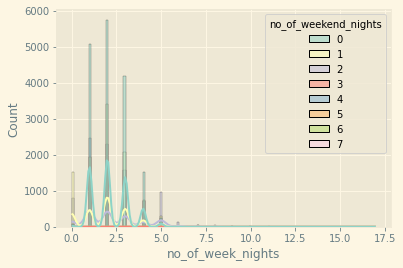

In [12]:
sns.histplot(x='no_of_week_nights',data=df,hue='no_of_weekend_nights',kde=True,palette='Set3');

# Meal plans

array([<AxesSubplot:ylabel='count'>], dtype=object)

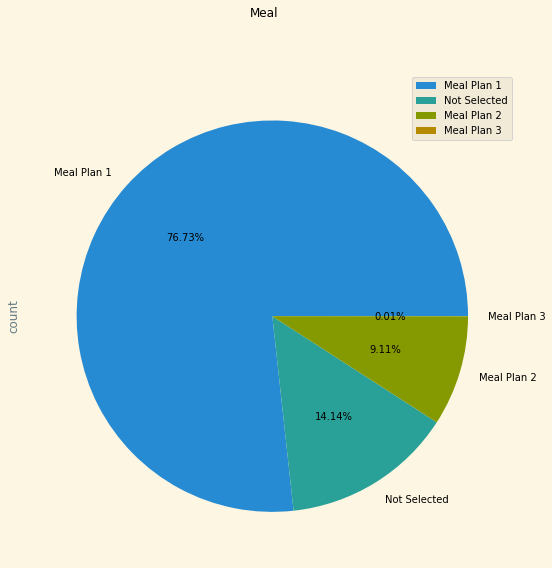

In [13]:
df.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Meal',figsize=(9,9))


# Parking spaces

array([<AxesSubplot:ylabel='count'>], dtype=object)

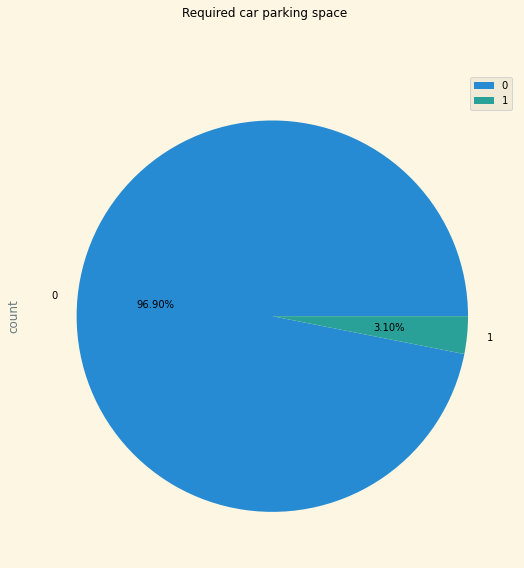

In [14]:
df.groupby('required_car_parking_space')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Required car parking space',figsize=(9,9))


# Room type

<AxesSubplot:ylabel='room_type_reserved'>

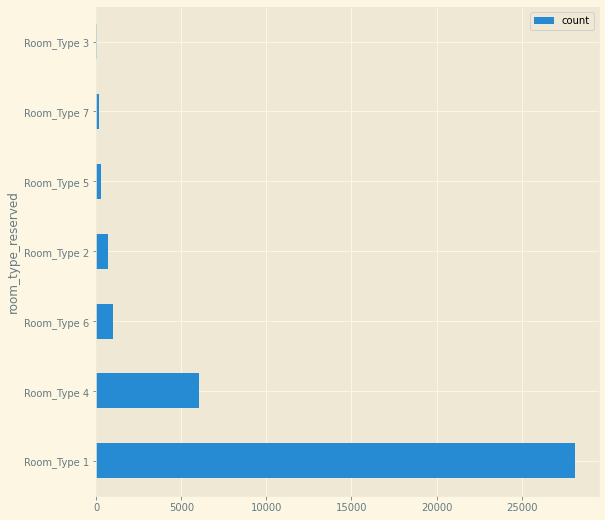

In [15]:
df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(9,9))


# Distribution by years, months, seasons, days

array([<AxesSubplot:ylabel='count'>], dtype=object)

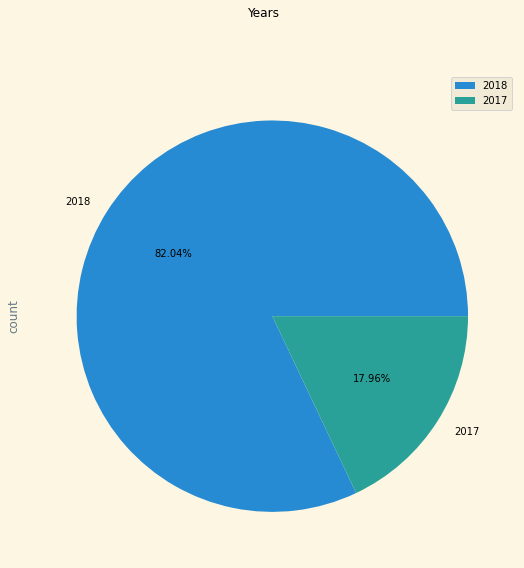

In [16]:
df.groupby('arrival_year')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Years',figsize=(9,9))


array([<AxesSubplot:ylabel='count'>], dtype=object)

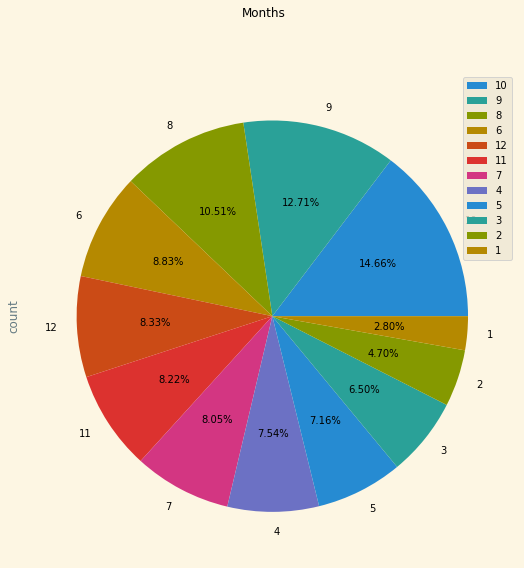

In [17]:
df.groupby('arrival_month')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Months',figsize=(9,9))


In [18]:
def season(x):
    if x in [9,10,11]:
        return 'Autumn'
    if x in [1,2,12]:
        return 'Winter'
    if x in [3,4,5]:
        return 'Spring'
    if x in [6,7,8]:
        return 'Summer'
    return x

In [19]:
df['season_group']=df['arrival_month'].apply(season)

array([<AxesSubplot:ylabel='count'>], dtype=object)

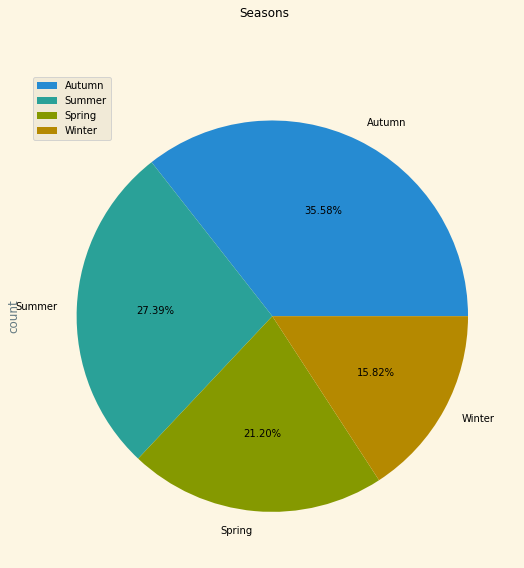

In [20]:
df.groupby('season_group')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Seasons',figsize=(9,9))


array([<AxesSubplot:ylabel='count'>], dtype=object)

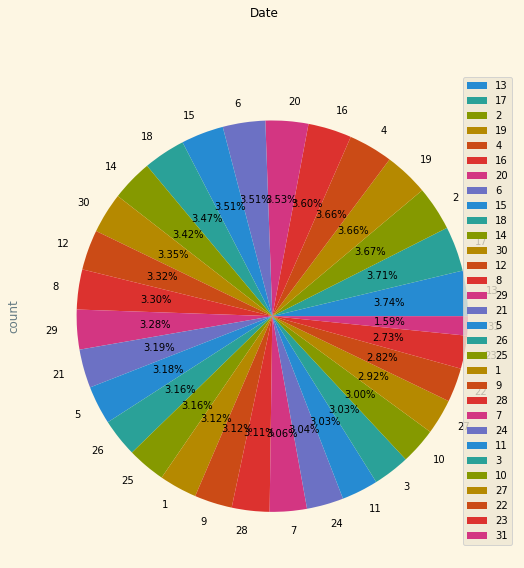

In [21]:
df.groupby('arrival_date')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Date',figsize=(9,9))


In [22]:
df.pivot_table(index='arrival_year',columns='arrival_month',values='arrival_date', aggfunc=(['count']))

count                                                          \
arrival_month      1       2       3       4       5       6       7       8    
arrival_year                                                                    
2017              NaN     NaN     NaN     NaN     NaN     NaN   363.0  1014.0   
2018           1014.0  1704.0  2358.0  2736.0  2598.0  3203.0  2557.0  2799.0   

                                               
arrival_month      9       10      11      12  
arrival_year                                   
2017           1649.0  1913.0   647.0   928.0  
2018           2962.0  3404.0  2333.0  2093.0

# Segments

array([<AxesSubplot:ylabel='count'>], dtype=object)

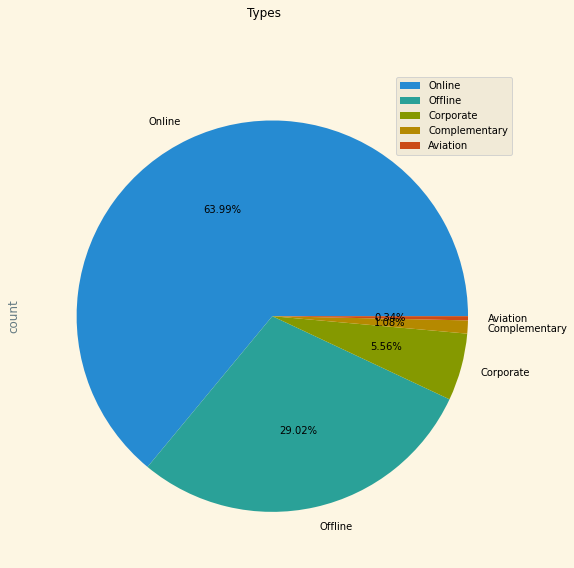

In [23]:
df.groupby('market_segment_type')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Types',figsize=(9,9))

# Repeated guest

array([<AxesSubplot:ylabel='count'>], dtype=object)

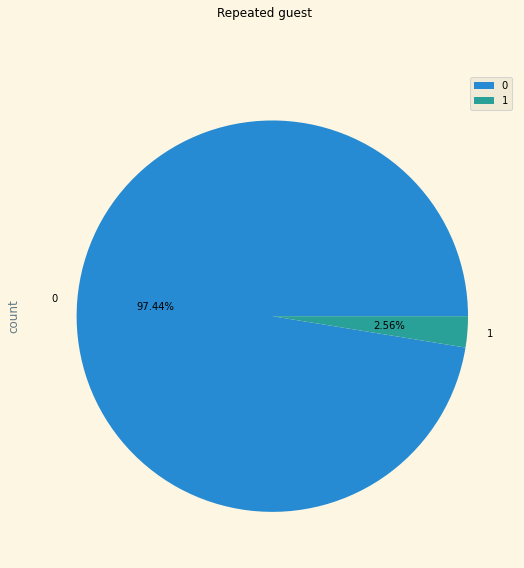

In [24]:
df.groupby('repeated_guest')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Repeated guest',figsize=(9,9))


# Cancellations in the past

array([<AxesSubplot:ylabel='count'>], dtype=object)

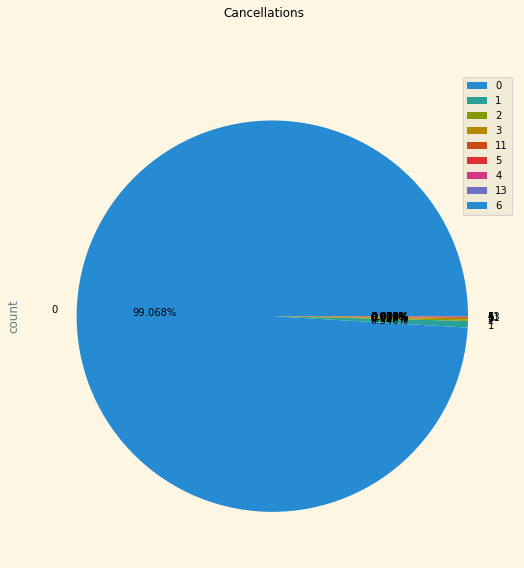

In [25]:
df.groupby('no_of_previous_cancellations')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Cancellations',figsize=(9,9))


# 0 cancellations

<AxesSubplot:title={'center':'0 cancellations'}, xlabel='no_of_previous_bookings_not_canceled'>

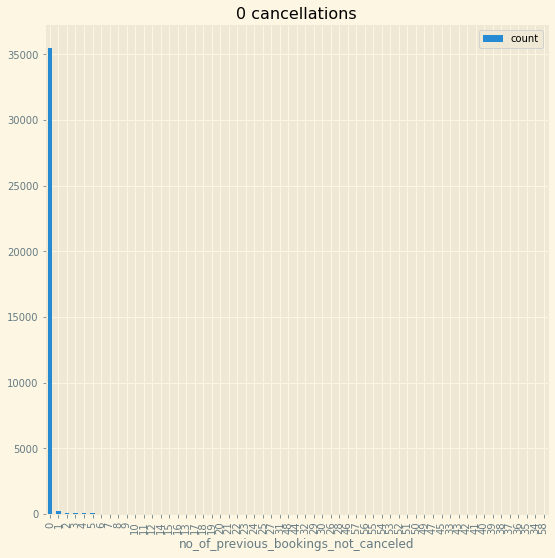

In [26]:
df.groupby('no_of_previous_bookings_not_canceled')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',title='0 cancellations',figsize=(9,9))


# Avg price

In [27]:
def avg_price_per_room_group(x):
    if x <= 50.0 :
        x= 'price below 50'
    elif x >50.0 and x <=150.0:
        x= 'price from 50 to 150'
    elif x >150.0 and x <=300.0:
        x= 'price from 150 to 300'
    elif x >300.0 and x <=450.0:
        x= 'price from 300 to 450'
    else:
        x= 'price 450+'
    return x

In [28]:
df['price_per_room_group']=df['avg_price_per_room'].apply(avg_price_per_room_group)

<AxesSubplot:ylabel='price_per_room_group'>

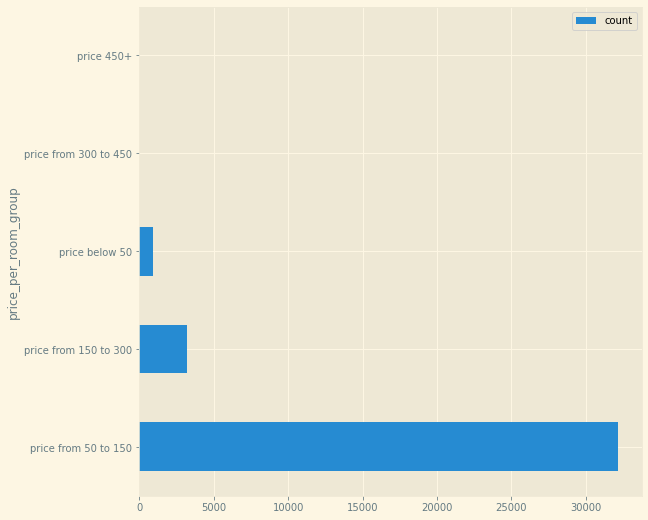

In [29]:
df.groupby('price_per_room_group')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(9,9))


# Special requests

<AxesSubplot:xlabel='no_of_special_requests'>

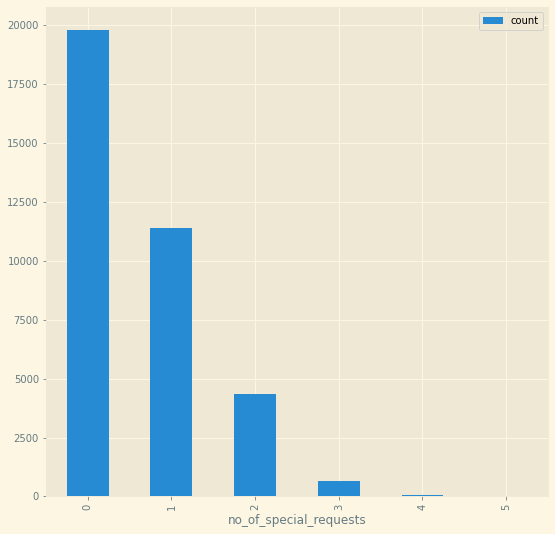

In [30]:
df.groupby('no_of_special_requests')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',figsize=(9,9))


# Booking status

array([<AxesSubplot:ylabel='count'>], dtype=object)

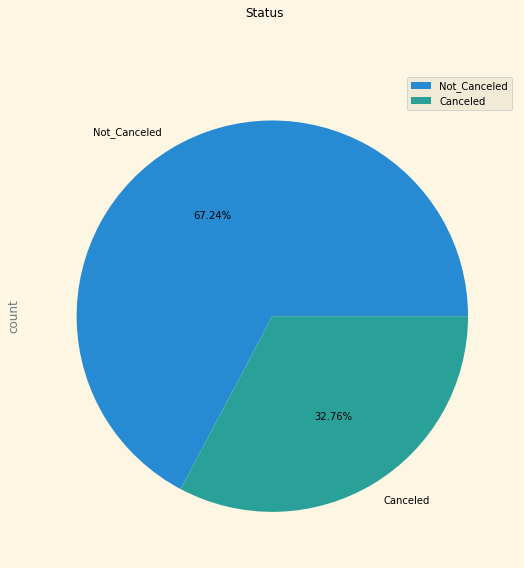

In [31]:
df.groupby('booking_status')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Status',figsize=(9,9))


# Correlations

<AxesSubplot:>

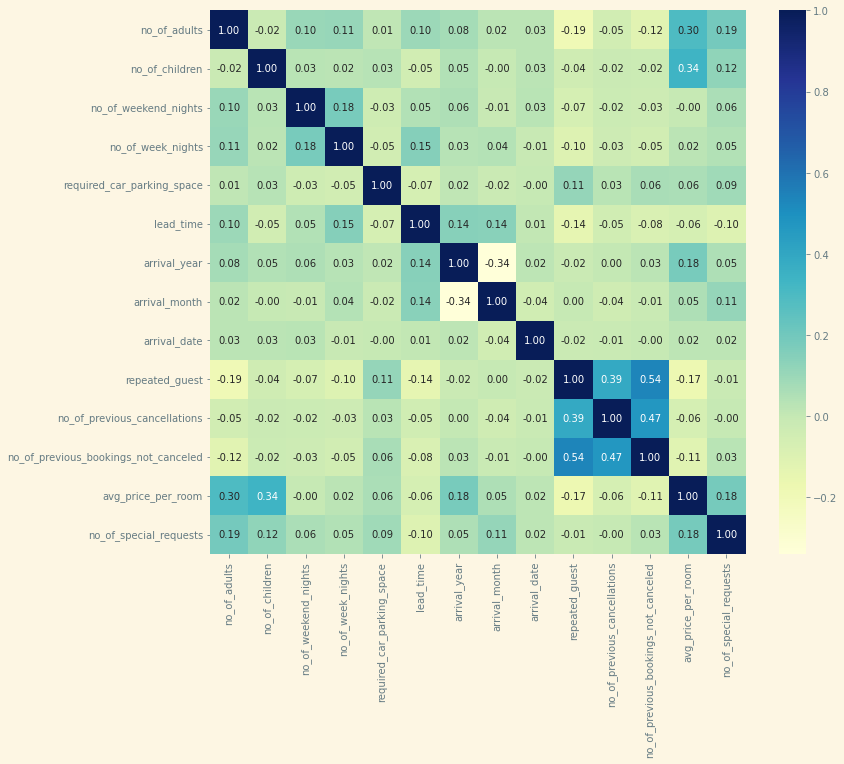

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

# Prediction

In [33]:
df2=df.copy()

In [34]:
df2['Booking_ID']=pd.factorize(df2.Booking_ID)[0]
df2['type_of_meal_plan']=pd.factorize(df2.type_of_meal_plan)[0]
df2['room_type_reserved']=pd.factorize(df2.room_type_reserved)[0]
df2['market_segment_type']=pd.factorize(df2.market_segment_type)[0]
df2['booking_status']=pd.factorize(df2.booking_status)[0]

In [35]:
X= df2.values[:,0:18]
Y= df2.values[:, 18]

In [36]:
df2

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,season_group,price_per_room_group
0,0,2,0,1,2,0,0,0,224,2017,...,2,0,0,0,0,65.00,0,0,Autumn,price from 50 to 150
1,1,2,0,2,3,1,0,0,5,2018,...,6,1,0,0,0,106.68,1,0,Autumn,price from 50 to 150
2,2,1,0,2,1,0,0,0,1,2018,...,28,1,0,0,0,60.00,0,1,Winter,price from 50 to 150
3,3,2,0,0,2,0,0,0,211,2018,...,20,1,0,0,0,100.00,0,1,Spring,price from 50 to 150
4,4,2,0,1,1,1,0,0,48,2018,...,11,1,0,0,0,94.50,0,1,Spring,price from 50 to 150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,1,85,2018,...,3,1,0,0,0,167.80,1,0,Summer,price from 150 to 300
36271,36271,2,0,1,3,0,0,0,228,2018,...,17,1,0,0,0,90.95,2,1,Autumn,price from 50 to 150
36272,36272,2,0,2,6,0,0,0,148,2018,...,1,1,0,0,0,98.39,2,0,Summer,price from 50 to 150
36273,36273,2,0,0,3,1,0,0,63,2018,...,21,1,0,0,0,94.50,0,1,Spring,price from 50 to 150


In [37]:
X= preprocessing.scale(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor()

In [40]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
score = rfr.score(X_train,y_train)
score

0.9503477390866548

In [42]:
y_pred5 = rfr.predict(X_test)
rscore=r2_score(y_test, y_pred5)
rscore

0.6413086640170831

In [43]:
df2['Prediction']=rfr.predict(X)

Text(0.5, 1.0, 'Real VS Prediction')

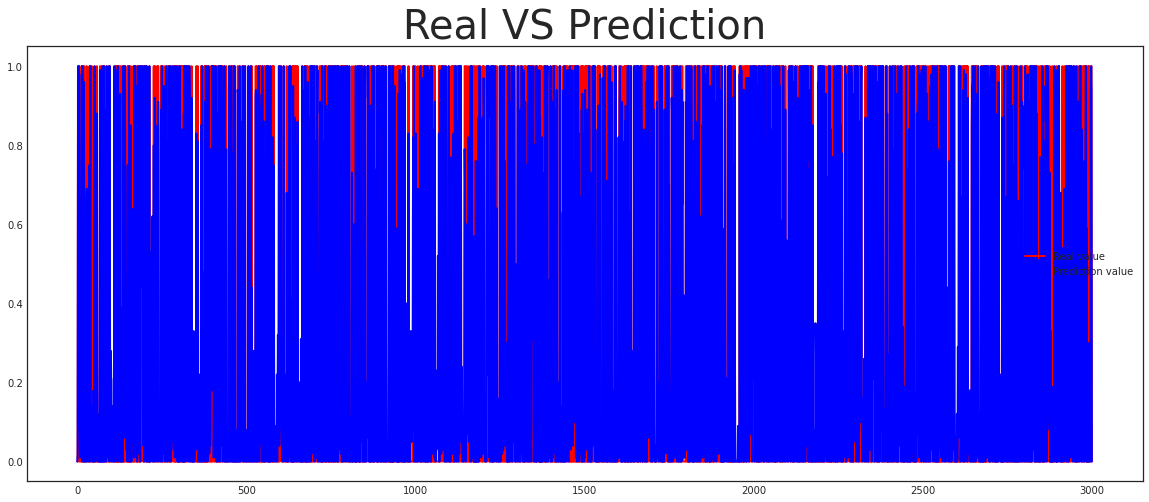

In [44]:
plt.style.use('seaborn-white')
plt.figure(figsize = (20,8))

plt.plot(df2[0:3000]['booking_status'], color = 'r', label = 'Real value')
plt.plot(df2[0:3000]['Prediction'], color = 'b', label = 'Prediction value')
plt.legend()
plt.title('Real VS Prediction', fontsize = 40)



**Hi, thank you so much for reading to the end, i just recently started doing analytics and your advice and comments are important to me. Don't forget to upvote this notebook if you like it!**